In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline


In [3]:
df=pd.read_csv('/content/amir_deals.csv')

In [4]:
# check the data
df.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [76]:
def hist(variable,ax,col):
  sns.set(style="darkgrid")
  sns.distplot(variable,ax=ax,color=col)
def kde(variable,ax,col):
  sns.set(style="darkgrid")
  sns.kdeplot(variable,ax=ax,color=col)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


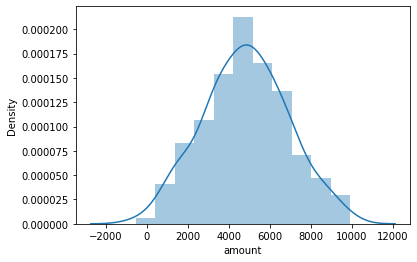

In [6]:
hist(df["amount"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


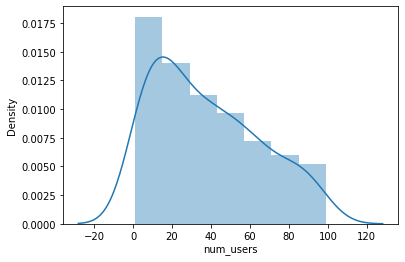

In [9]:
# right skewed
hist(df["num_users"])

In [14]:
me=df['amount'].mean()

In [11]:
st=df['amount'].std()

In [12]:
from scipy.stats import norm

In [19]:
# the  percentage of amoount amir sale less tha 7000 is 85%
norm.cdf(7000,me,st)


0.8561268185296924

In [20]:
# the  percentage of amoount amir sale less tha 1000 is 0.32%
norm.cdf(1000,me,st)

0.032003719620242205

In [22]:
# the  percentage of amoount amir sale  grater  tha 7000 is 14%
1-norm.cdf(7000,me,st)

0.1438731814703076

In [24]:
sample_mean=[]
for i in range(100):
  sample=df["num_users"].sample(10)
  sample_mean.append(sample.mean())
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


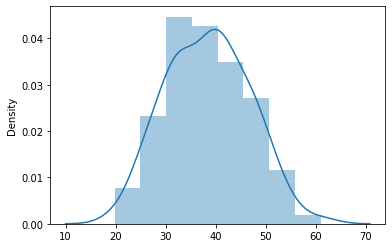

In [25]:
#Central limit theorem
hist(sample_mean)

In [28]:
me_num=np.mean(sample_mean)
st_num=np.std(sample
              )

In [35]:

# what is the value the  less than 90% of num_user
norm.ppf(0.9,me_num,st_num)


68.0663450488255

Text(0.5, 1.0, 'expon Distribution')

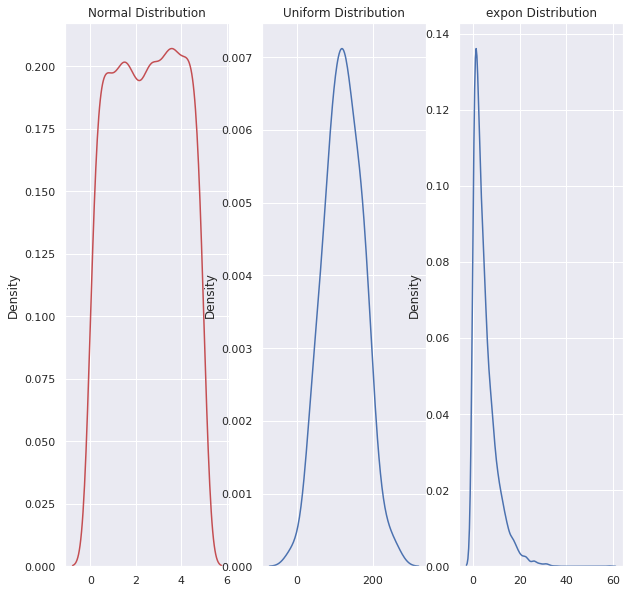

In [84]:

# different Distibution
from scipy.stats import uniform
fig,ax=plt.subplots(1,3,figsize=(10,10))
uniform_dist=uniform.rvs(0,5,size=5000)

kde(uniform_dist,ax[0],"r")
ax[1].set_title("Uniform Distribution")
kde(normal_dist,ax[1],"b")
ax[0].set_title("Normal Distribution")
from scipy.stats import expon
expon_dist=expon.rvs(0,5,size=5000)
kde(expon_dist,ax[2],"b")
ax[2].set_title("expon Distribution")

In [101]:
print(df['amount'].corr(df['num_users']))


0.04456768925073198
-0.019807226771848204


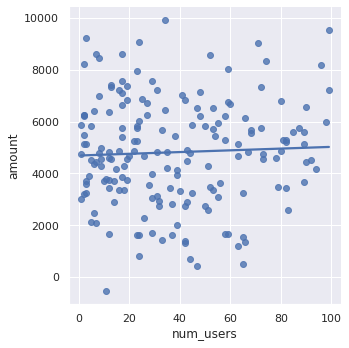

In [92]:
#correlation
sns.lmplot(x='num_users',y="amount",data=df,ci=None)

In [104]:
df2=df.copy()
df3=df.copy()
df2["num_users"]=np.log(df2["num_users"])
print(df2['amount'].corr(df2['num_users']))

-0.019807226771848204


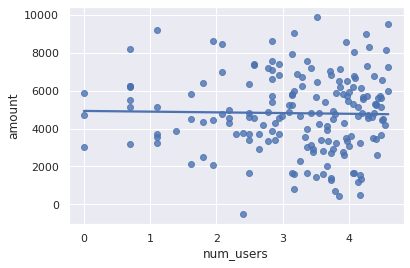

In [110]:
#correlation after log transformation
sns.regplot(x='num_users',y="amount",data=df2,ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


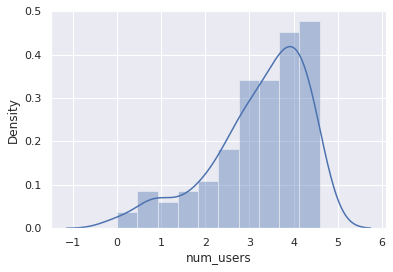

In [103]:
#left skewed after log transformation
sns.distplot(df2['num_users'])

In [107]:
# square root transformation
df3["num_users"]=np.sqrt(df["num_users"])
print(df3['amount'].corr(df3['num_users']))

0.011806577455039444


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


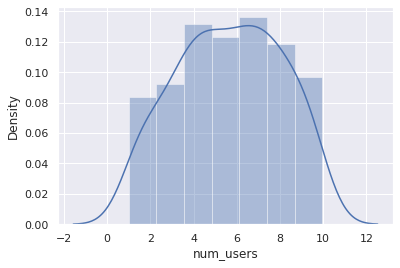

In [106]:
# Now the data is normal distribution
sns.distplot(df3['num_users'])

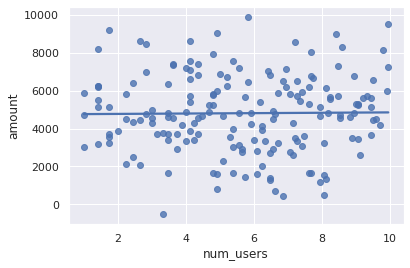

In [109]:
# relation after the sqrt transformation
sns.regplot(x='num_users',y="amount",data=df3,ci=None)